<a href="https://colab.research.google.com/github/shoaibimt/CancerAI/blob/main/file_5_feature_selection_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature selection  based on selectKbest method

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
sns.set(style='ticks')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
## Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['inactive', 'active']); ax.yaxis.set_ticklabels(['inactive', 'active'])

In [ ]:
path_cdk= '/content/drive/MyDrive/inhibitor_prediction/bcr_abl/chembl_data_retrieve/mol_fingerprints/Results/CDK.csv'

In [ ]:
path_bin = '/content/drive/MyDrive/inhibitor_prediction/bcr_abl/chembl_data_retrieve/chembl_bin_values.csv'

In [ ]:
y = pd.read_csv(path_bin)

In [ ]:
y #dependent column (output column)

,pchembl_bin
0,0
1,0
2,0
3,0
4,0
...,...
393,1
394,1
395,0
396,1


In [ ]:
#p=sns.FacetGrid(col="Survived",data=train_data)
#p.map(plt.hist,"Age")

In [ ]:
#maccs_df= pd.read_csv(path_maccs)

In [ ]:
cdk_df= pd.read_csv(path_cdk)

In [ ]:
#maccs_df

In [ ]:
cdk_df

,Name,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,...,FP1015,FP1016,FP1017,FP1018,FP1019,FP1020,FP1021,FP1022,FP1023,FP1024
0,CHEMBL199723,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,CHEMBL381738,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
2,CHEMBL436509,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
3,CHEMBL370800,1,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
4,CHEMBL165,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,CHEMBL4794093,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
394,CHEMBL4794284,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,0
395,CHEMBL4780226,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
396,CHEMBL4786855,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
#X_maccs=maccs_df.drop('Name', axis=1)

In [ ]:
X_cdk = cdk_df.drop('Name', axis=1)

In [ ]:
#X_maccs

In [ ]:
X_cdk # independent columns

,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,FP10,...,FP1015,FP1016,FP1017,FP1018,FP1019,FP1020,FP1021,FP1022,FP1023,FP1024
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,0
395,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
X_cdk.columns

Index(['FP1', 'FP2', 'FP3', 'FP4', 'FP5', 'FP6', 'FP7', 'FP8', 'FP9', 'FP10',
       ...
       'FP1015', 'FP1016', 'FP1017', 'FP1018', 'FP1019', 'FP1020', 'FP1021',
       'FP1022', 'FP1023', 'FP1024'],
      dtype='object', length=1024)

In [ ]:
X_cdk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Columns: 1024 entries, FP1 to FP1024
dtypes: int64(1024)
memory usage: 3.1 MB


In [ ]:
#featureScores = pd.concat([dfcolumns,dfscores, dfpvalue],axis=1)
#featureScores.columns = ['Specs','Score', 'p-value']

**logistic regression without feature selection**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cdk, y, test_size=0.2, random_state=123)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((318, 1024), (80, 1024), (318, 1), (80, 1))

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Get explained variance ratio (percentage of variance explained by each component)
explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
# Plotting PCA representation of training and testing data on the same graph
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

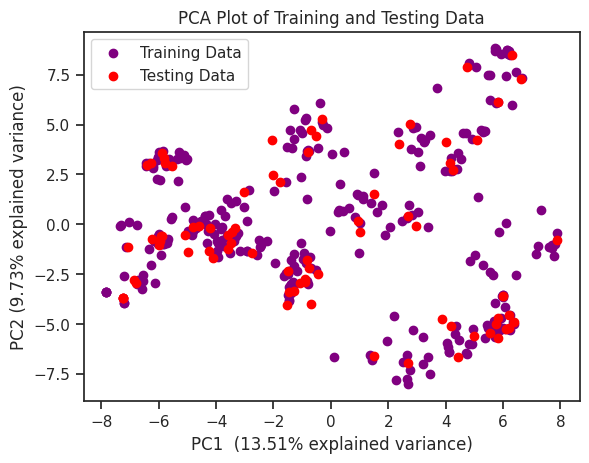

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c='purple', label='Training Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c='red', label='Testing Data')
plt.title('PCA Plot of Training and Testing Data')
plt.xlabel(f'PC1  ({explained_variance_ratio[0]*100:.2f}% explained variance)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% explained variance)')

plt.legend()
plt.grid(False)
plt.show()

In [ ]:
import matplotlib.colors as colors
from matplotlib.colors import to_rgba
from matplotlib.colors import ListedColormap

In [ ]:
ynew = y.replace({0: 'inactive', 1: 'active'})

In [ ]:
ynew

,pchembl_bin
0,inactive
1,inactive
2,inactive
3,inactive
4,inactive
...,...
393,active
394,active
395,inactive
396,active


In [ ]:

from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_cdk)
#c = colors.to_rgba('pchembl_bin')
y_categorical = pd.Categorical(ynew)
print(y_categorical)



['pchembl_bin']
Categories (1, object): ['pchembl_bin']


In [ ]:
#cmap = ListedColormap(ynew)
#colors = ynew.applymap(lambda x: 'blue' if x == 'inactive' else 'red')
# Plot t-SNE representation
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_categorical.codes, cmap='viridis')
plt.title('t-SNE Plot of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(ticks=range(len(y_categorical.categories)), label='pchembl_bin',
             boundaries=range(-1, len(y_categorical.categories)))
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score

In [ ]:
pred = log_model.predict(X_test)
print("Accuracy_of_the_model :",accuracy_score(y_test,pred))
print("Classification Report :")
print(classification_report(y_test,pred))

Accuracy_of_the_model : 0.75
Classification Report :
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        44
           1       0.71      0.75      0.73        36

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80



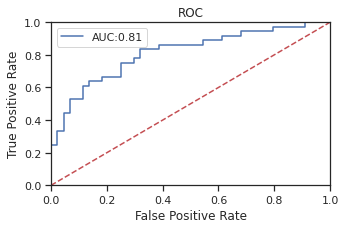

In [ ]:
# Plot the ROC-AUC plot
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib.pyplot as plt
pred_prob = log_model.predict_log_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,pred_prob)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(5,3))
plt.title("ROC")
plt.plot(fpr,tpr,"b",Label="AUC:{}".format(round(roc_auc,2)))
plt.legend(loc=2)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(n_estimators = 100)
#clf.fit(X_train, y_train.values.ravel())

In [ ]:
rfc=RandomForestClassifier(random_state=123)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, 9, 10],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [ ]:
CV_rfc.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=6, criterion='gini')

In [ ]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

In [ ]:
y_pred = rfc1.predict(X_test)
print("Accuracy_of_the_model :",accuracy_score(y_test,y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))

Accuracy_of_the_model : 0.7625
Classification Report :
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        44
           1       0.76      0.69      0.72        36

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



**logistic regression with feature selection selectKBest and chi2 test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=  train_test_split(X_cdk,y,test_size = 0.2,random_state = 123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((318, 1024), (80, 1024), (318, 1), (80, 1))

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
fp = chi2(X_train, y_train)

In [ ]:
fp

(array([12.6653247 ,  0.978313  ,  4.78083685, ...,  2.15384712,
        21.46034869,  3.63961184]),
 array([3.72499833e-04, 3.22615653e-01, 2.87781323e-02, ...,
        1.42213153e-01, 3.61221241e-06, 5.64200868e-02]))

In [ ]:
p_values= pd.Series(fp[0])

In [ ]:
p_values.index= X_train.columns

In [ ]:
p_values

FP1       12.665325
FP2        0.978313
FP3        4.780837
FP4        0.951062
FP5        0.574863
            ...    
FP1020     0.008866
FP1021     0.128432
FP1022     2.153847
FP1023    21.460349
FP1024     3.639612
Length: 1024, dtype: float64

In [ ]:
p_values.sort_index(ascending= False)

FP999     18.866085
FP998      1.030686
FP997      3.636454
FP996      1.609639
FP995      4.078752
            ...    
FP1001     0.423599
FP1000     1.480639
FP100      2.804767
FP10       7.411512
FP1       12.665325
Length: 1024, dtype: float64

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
chi2_features =SelectKBest(chi2, k = 100)
X_best_features = chi2_features.fit_transform(X_cdk, y)
print("original features: " ,X_cdk.shape[1])
print("reduced features: " ,X_best_features.shape[1])

original features:  1024
reduced features:  100


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X_cdk,y)
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(X_cdk.columns)
#dfpvalue = pd.DataFrame(fit.pvalues_)

In [ ]:
features_score_pvalue=pd.DataFrame({"Score":fit.scores_,"P_Value":np.round(fit.pvalues_,3)},index=X_cdk.columns)
features_score_pvalue.nlargest(n=20,columns="Score")

,Score,P_Value
FP92,47.590042,0.0
FP141,46.186623,0.0
FP550,42.902290,0.0
FP971,40.340181,0.0
FP640,39.608659,0.0
FP537,38.911197,0.0
FP257,37.384745,0.0
FP362,37.224514,0.0
FP240,36.646531,0.0
FP40,34.936498,0.0


In [ ]:
features_score_pvalue = features_score_pvalue[features_score_pvalue["P_Value"]<0.50]
selected_cat_cols = features_score_pvalue.index.values.tolist()

In [ ]:
selected_cat_cols

In [ ]:
np.shape(selected_cat_cols)

(814,)

In [ ]:
num_cols = X_cdk.select_dtypes(include=["float64","int64"]).columns.to_list()

In [ ]:
np.shape(num_cols)

(1024,)

In [ ]:
num_cols

In [ ]:
selected_cols = selected_cat_cols + num_cols

In [ ]:
selected_cols

In [ ]:
np.shape(selected_cols)

(1838,)

In [ ]:
X_select = X_cdk[selected_cat_cols]

In [ ]:
X_select

,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP9,FP10,FP12,...,FP1012,FP1013,FP1014,FP1015,FP1016,FP1017,FP1018,FP1022,FP1023,FP1024
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,0,0,0,0
395,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
X_select.shape

(398, 814)

In [ ]:
X_select.nunique()

FP1       2
FP2       2
FP3       2
FP4       2
FP5       2
         ..
FP1017    2
FP1018    2
FP1022    2
FP1023    2
FP1024    2
Length: 814, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc,classification_report,accuracy_score
Xs_train,Xs_test,ys_train,ys_test = train_test_split(X_select,y,test_size = 0.2,random_state = 123)
Xs_train.shape, Xs_test.shape, ys_train.shape, ys_test.shape

((318, 814), (80, 814), (318, 1), (80, 1))

In [ ]:
ys_train

,pchembl_bin
232,1
237,0
6,0
220,1
336,0
...,...
230,1
98,1
322,0
382,0


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(Xs_train,ys_train)

LogisticRegression()

In [ ]:
pred_reg = log_reg.predict(Xs_test)
print("Accuracy_bae_model :",accuracy_score(ys_test,pred_reg))
print("Classification Report :")
print(classification_report(ys_test,pred_reg))

Accuracy_bae_model : 0.7375
Classification Report :
              precision    recall  f1-score   support

           0       0.78      0.73      0.75        44
           1       0.69      0.75      0.72        36

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.74      0.74      0.74        80



In [ ]:
rfc_1=RandomForestClassifier(random_state=123)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, 9, 10],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc_1 = GridSearchCV(estimator=rfc_1, param_grid=param_grid, cv= 5)

In [ ]:
CV_rfc_1.fit(Xs_train,ys_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 500]})

In [ ]:
CV_rfc_1.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [ ]:
rfc12=RandomForestClassifier(random_state=123, max_features='log2', n_estimators= 200, max_depth=8, criterion='entropy')

In [ ]:
rfc12.fit(Xs_train, ys_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       n_estimators=200, random_state=123)

In [ ]:
y_pred = rfc12.predict(Xs_test)
print("Accuracy_of_the_model :",accuracy_score(ys_test,y_pred))
print("Classification Report :")
print(classification_report(ys_test,y_pred))

Accuracy_of_the_model : 0.775
Classification Report :
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        44
           1       0.76      0.72      0.74        36

    accuracy                           0.78        80
   macro avg       0.77      0.77      0.77        80
weighted avg       0.77      0.78      0.77        80



**feature selection using variance threshold**

In [ ]:
from sklearn.model_selection import train_test_split
Xv_train,Xv_test,yv_train,yv_test = train_test_split(X_cdk,y,test_size = 0.2,random_state = 123)
Xv_train.shape, Xv_test.shape, yv_train.shape, yv_test.shape

((318, 1024), (80, 1024), (318, 1), (80, 1))

In [ ]:
var_thres = VarianceThreshold(threshold=0.1)
var_thres.fit(Xv_train)

VarianceThreshold(threshold=0.1)

**non-constant features**

In [ ]:
sum(var_thres.get_support())

743

In [ ]:
Xv_train.columns[var_thres.get_support()]

Index(['FP1', 'FP2', 'FP3', 'FP7', 'FP9', 'FP12', 'FP14', 'FP15', 'FP16',
       'FP17',
       ...
       'FP1008', 'FP1009', 'FP1011', 'FP1012', 'FP1015', 'FP1016', 'FP1017',
       'FP1019', 'FP1022', 'FP1023'],
      dtype='object', length=743)

In [ ]:
constant_columns = [column for column in Xv_train.columns
                    if column not in Xv_train.columns[var_thres.get_support()]]

print(len(constant_columns))

281


In [ ]:
for feature in constant_columns:
     print(feature)

In [ ]:
Xv_train2= Xv_train.drop(constant_columns,axis=1)
Xv_train2

,FP1,FP2,FP3,FP7,FP9,FP12,FP14,FP15,FP16,FP17,...,FP1008,FP1009,FP1011,FP1012,FP1015,FP1016,FP1017,FP1019,FP1022,FP1023
232,0,1,0,1,0,1,1,0,0,1,...,1,1,1,1,0,1,1,0,0,0
237,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220,0,1,1,0,0,0,1,1,0,1,...,0,1,1,0,1,1,1,0,0,0
336,0,1,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,0,1,0,1,0,0,1,0,0,1,...,1,1,1,1,0,1,1,0,0,0
98,1,1,0,1,1,0,1,1,1,1,...,1,1,0,1,0,1,1,0,0,0
322,0,0,1,0,0,0,1,0,1,1,...,1,1,0,1,0,1,1,1,0,0
382,0,0,0,0,0,0,1,0,0,1,...,1,1,0,1,0,0,0,1,0,0


In [ ]:
Xv_test2 = var_thres.transform(Xv_test)
Xv_test.shape, Xv_test2.shape

((80, 1024), (80, 743))

In [ ]:
'''from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.15):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(Xv_train, threshold=0.15)
X'''

'from sklearn.feature_selection import VarianceThreshold\n\ndef remove_low_variance(input_data, threshold=0.15):\n    selection = VarianceThreshold(threshold)\n    selection.fit(input_data)\n    return input_data[input_data.columns[selection.get_support(indices=True)]]\n\nX = remove_low_variance(Xv_train, threshold=0.15)\nX'

In [ ]:
#X.shape, X_train.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc,classification_report,accuracy_score

In [ ]:
log_reg_lv = LogisticRegression()
log_reg_lv.fit(Xv_train2,yv_train)

LogisticRegression()

In [ ]:
pred_reg_lv = log_reg_lv.predict(Xv_test2)
print("Accuracy_lg_model :",accuracy_score(yv_test,pred_reg_lv))
print("Classification Report :")
print(classification_report(yv_test,pred_reg_lv))

Accuracy_lg_model : 0.725
Classification Report :
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        44
           1       0.69      0.69      0.69        36

    accuracy                           0.73        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.72      0.72      0.72        80



**Random Forest after feature selection**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy", random_state=42)
classifier.fit(Xv_train2, yv_train)
y_pred= classifier.predict(Xv_test2)
print("Accuracy_of_the_model :",accuracy_score(yv_test,y_pred))

Accuracy_of_the_model : 0.775


In [ ]:
rfc=RandomForestClassifier(random_state=123)

In [ ]:
param_grid = {
    'n_estimators': [5,10,50,100,250,200,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8, 16, 32, None],
    'criterion' :['gini', 'entropy']
}

In [ ]:
param_grid_2 = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, 9, 10],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_2, cv= 5)

In [ ]:
CV_rfc.fit(Xv_train2, yv_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [ ]:
rfc1=RandomForestClassifier(random_state=123, max_features='auto', n_estimators= 100, max_depth=8, criterion='entropy')

In [ ]:
rfc1.fit(Xv_train2, yv_train)

RandomForestClassifier(criterion='entropy', max_depth=8, random_state=123)

In [ ]:
pred = rfc1.predict(Xv_test2)
print("Accuracy_of_the_model :",accuracy_score(yv_test,pred))
print("Classification Report :")
print(classification_report(yv_test,pred))

Accuracy_of_the_model : 0.75
Classification Report :
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        44
           1       0.74      0.69      0.71        36

    accuracy                           0.75        80
   macro avg       0.75      0.74      0.75        80
weighted avg       0.75      0.75      0.75        80



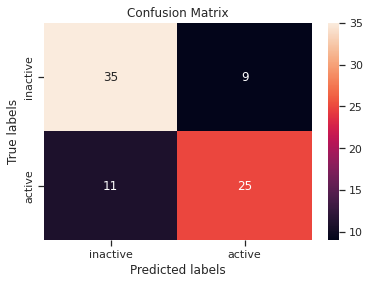

In [ ]:
plot_confusion_matrix(yv_test,pred)

In [ ]:
#plt.figure(figsize= (20,18))
#sns.clustermap(Xv_train.corr())

In [ ]:
'''# Parameters
maxdepth = 10
nestimators = 200
n_splits = 5
output_file = f'RandomForest_maxdepth{maxdepth}_nestimators{nestimators}.bin' '''

"# Parameters\nmaxdepth = 10\nnestimators = 200\nn_splits = 5\noutput_file = f'RandomForest_maxdepth{maxdepth}_nestimators{nestimators}.bin' "

**Logistic Regression**

In [ ]:
lr_params ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [ ]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

In [ ]:
logreg_cv = GridSearchCV(lr, lr_params, cv=10)

In [ ]:
logreg_cv.fit(Xv_train2, yv_train.values.ravel())

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7518145161290323


In [ ]:
ypred=logreg_cv.predict(Xv_test2)

In [ ]:
logreg_cv.score(Xv_test2, yv_test)

0.75

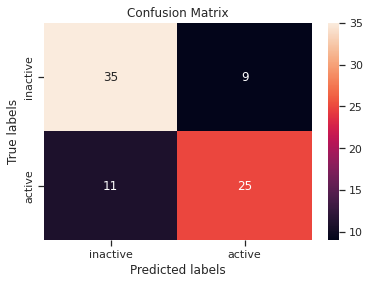

In [ ]:
plot_confusion_matrix(yv_test,ypred)

**Support Vector Machine**

In [ ]:
svm_params = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
svm_cv = GridSearchCV(svm, svm_params, cv=10)

In [ ]:
svm_cv.fit(Xv_train2,yv_train.values.ravel())

KeyboardInterrupt: ignored

In [ ]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

In [ ]:
svm_cv.score(Xv_test2, yv_test)

In [ ]:
ypred_svm=svm_cv.predict(Xv_test2)
plot_confusion_matrix(yv_test,ypred_svm)

**Decision Tree**

In [ ]:
dt_params = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
tree_cv = GridSearchCV(tree, dt_params, cv=10)

In [ ]:
tree_cv.fit(Xv_train,yv_train.values.ravel())

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

In [ ]:
tree_cv.score(Xv_test,yv_test)

In [ ]:
ypred_dt = tree_cv.predict(Xv_test)
plot_confusion_matrix(yv_test,ypred_dt)

**KNN**

In [ ]:
knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
knn_cv = GridSearchCV(KNN, knn_params, cv=10)

In [ ]:
knn_cv.fit(Xv_train,yv_train.values.ravel())

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

In [ ]:
knn_cv.score(Xv_test,yv_test)

In [ ]:
yhat = knn_cv.predict(Xv_test)
plot_confusion_matrix(yv_test,yhat)

**till here**

In [ ]:
# Training
print(f'Training the model')

rf = RandomForestClassifier(max_depth=maxdepth, n_estimators=nestimators, n_jobs=-1,
                            random_state=10).fit(X_train, y_train.values.ravel())

In [ ]:
# Validation

print(f'Doing validation')
print(f'ROC AUC is used as performance metric')

cv_scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=n_splits, scoring="roc_auc")

print('Validation results:')
print(f'RandomForest with max_depth={maxdepth} and n_estimators={nestimators}: \
    {np.mean(cv_scores):.2f} +- {np.std(cv_scores):.2f}')

In [ ]:
# Predicting values with RF model on test dataset
print(f'Doing evaluation on test dataset')
y_test_pred = rf.predict(X_test)

In [ ]:
## Calculate performance metrics
roc_auc_test = roc_auc_score(y_test, y_test_pred)

acc_test = accuracy_score(y_test, y_test_pred)

prec_test = precision_score(y_test, y_test_pred)

recall_test = recall_score(y_test, y_test_pred)

f1score_test = f1_score(y_test, y_test_pred)

In [ ]:
# Print metrics values
print(f'Testing results:')
metrics_names = ["ROC_AUC", "Accuracy", "Precision", "Recall", "F1 score"]
metrics_values = [roc_auc_test, acc_test, prec_test, recall_test, f1score_test]

In [ ]:
metrics = dict(zip(metrics_names, metrics_values))

In [ ]:
headers = ('Metric', 'Value')
spaces = ('----------', '----------')

In [ ]:
head_spaces = [headers, spaces]

In [ ]:
for metric, value in head_spaces:
    print(f'{metric:>10s} {value:>10s}')

In [ ]:
for metric, value in metrics.items():
    print(f'{metric:>10s} {value:>10.2f}')